# Study 1 for leaf recognition

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from scipy.stats import boxcox



### TODO
1. ~~basic info~~
3. ~~nulls~~
2. skewness
3. outliers
3. important features and correlation matrix

In [2]:
df_train = pd.read_csv('train.csv.zip', sep=',', header=0, compression='zip',encoding='cp1252')
df_test =  pd.read_csv('test.csv.zip', sep=',', header=0, compression='zip',encoding='cp1252')
print(df_train.shape)
print(df_test.shape)


(990, 194)
(594, 193)


In [3]:
df_train.sample(5)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
642,1014,Phildelphus,0.015625,0.042969,0.056641,0.025391,0.001953,0.050781,0.027344,0.000000,...,0.0,0.0,0.001953,0.008789,0.097656,0.00000,0.000000,0.003906,0.028320,0.000977
830,1330,Phildelphus,0.025391,0.046875,0.054688,0.035156,0.005859,0.029297,0.025391,0.005859,...,0.0,0.0,0.010742,0.000000,0.042969,0.00000,0.003906,0.000000,0.025391,0.011719
371,614,Cornus_Controversa,0.041016,0.082031,0.013672,0.001953,0.000000,0.156250,0.013672,0.003906,...,0.0,0.0,0.029297,0.000000,0.009766,0.00000,0.000000,0.000000,0.005859,0.001953
451,740,Populus_Adenopoda,0.005859,0.007812,0.017578,0.074219,0.003906,0.001953,0.066406,0.005859,...,0.0,0.0,0.000000,0.062500,0.003906,0.17871,0.000000,0.008789,0.000000,0.000000
641,1013,Betula_Pendula,0.000000,0.005859,0.033203,0.001953,0.021484,0.007812,0.003906,0.003906,...,0.0,0.0,0.000000,0.047852,0.000000,0.22461,0.000000,0.042969,0.005859,0.000000


In [4]:
df_train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [5]:
df_train.isnull().sum().sum()

0

In [6]:
means = df_train.ix[:,2:].mean()
( means.max() - means.min(), means.std() )

(0.041141939393939467, 0.009711506745082836)

In [7]:
df_train.dtypes[df_train.dtypes!='float64']

id          int64
species    object
dtype: object

/opt/conda/lib/python3.5/site-packages/scipy/stats/morestats.py:905: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/opt/conda/lib/python3.5/site-packages/scipy/optimize/optimize.py:1876: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.5/site-packages/scipy/stats/morestats.py:905: RuntimeWarning: invalid value encountered in subtract
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))


93

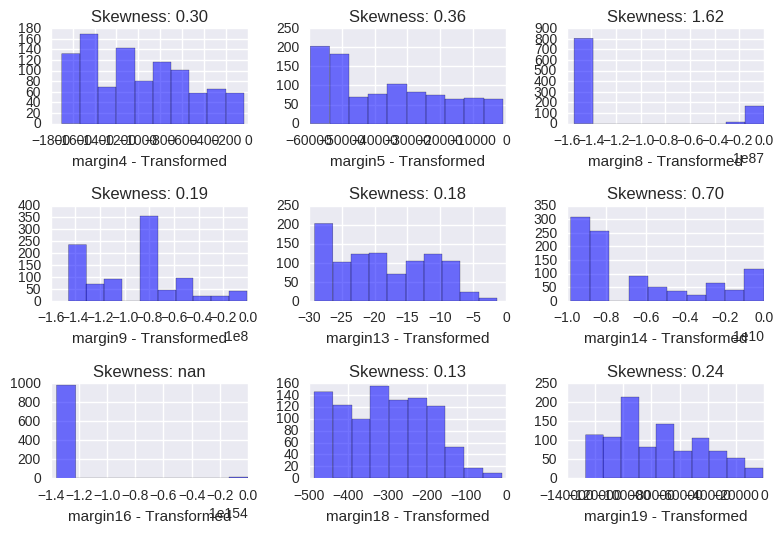

In [8]:
skewed = []

i = 0
figure = plt.figure()
for c in df_train.columns[2:]:
    if np.abs(df_train[c].skew()) > 2:
        i = i + 1
        skewed.append(c)
        
        df_train[c], _ = boxcox(df_train[c]+.1)
        
        if i < 10:
            figure.add_subplot(3,3,i)
            plt.hist(df_train[c],facecolor='blue',alpha=0.55) 
            plt.xlabel(c + " - Transformed") 
            skness = df_train[c].skew()
            plt.title("Skewness: {0:.2f}".format(skness)) 
plt.tight_layout()
len(skewed)



In [9]:
X = df_train.ix[:,2:]
Y = df_train.ix[:,1]

enc = preprocessing.LabelEncoder()
Y = enc.fit_transform(Y)

X_tr, X_val, y_tr, y_val = train_test_split(X, Y, test_size=.3, random_state = 13)
(X_tr.shape, X_val.shape)

((693, 192), (297, 192))

In [16]:
svc = svm.SVC()


param_grid = [
  {'C': [10, 50, 75, 100, 125, 250], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

gs = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
gs = gs.fit(X_tr, y_tr)

be = gs.best_estimator_
print(gs.best_params_)
print(be)
print("Grid scores on development set:")
print()
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

svc = svm.SVC(C=be.C, kernel=be.kernel, probability=True).fit(X_tr, y_tr)
svc.score(X_val, y_val)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/opt/conda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:580: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.0s finished


{'kernel': 'linear', 'C': 10}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Grid scores on development set:

0.012 (+/-0.004) for {'kernel': 'linear', 'C': 10}
0.012 (+/-0.004) for {'kernel': 'linear', 'C': 50}
0.012 (+/-0.004) for {'kernel': 'linear', 'C': 75}
0.012 (+/-0.004) for {'kernel': 'linear', 'C': 100}
0.012 (+/-0.004) for {'kernel': 'linear', 'C': 125}
0.012 (+/-0.004) for {'kernel': 'linear', 'C': 250}
0.012 (+/-0.004) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 1}
0.012 (+/-0.004) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 1}
0.012 (+/-0.004) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 10}
0.012 (+/-0.004) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 10}
0.012 (+/-0.004) for {'gamma': 0.001, 'kernel': 'rbf', 'C': 100}
0.012 (+/-0.004) for {'gamma': 0.0001, 'kernel': 'rbf', 'C': 100}
0.012 (+/-0.00

0.0067340067340067337

In [11]:

data = svc.predict_proba(df_test.ix[:,1:])
cols = enc.inverse_transform(svc.classes_)
index = df_test['id'].values

res = pd.DataFrame(data=data, columns=cols, index=index)

res.to_csv('submission_svc.csv', index_label='id')

In [12]:
# 1st attempt w/o unskewing: 2.49084